<img src = "https://drive.google.com/uc?id=1yCymrlge8a_0LflEdjil9GBaYmSoP4O0" height = 80 width = 150>

# Coursera Review

## What is Coursera?
Coursera is an online learning platform that allows you to take online education courses. These courses come with the opportunity to earn degrees from leading universities and companies.

## Is Coursera Really Worth It?
- If students recommend Coursera online learning, they leave positive comments and high rating(4-5 label).While if students are not satisfied with the Coursera online learning, they leaves negative comments and low rating(1-2 label).

- In this notebook, the sentiment of reviews is binary, meaning the review rating <=2 results in a sentiment score of 0, and rating >=4 have a sentiment score of 1. 

- Dataset: 100K+ Scraped Course Reviews from the Coursera Website (As of May 2017)

In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('reviews.csv')
dataset.drop(columns="Id", inplace=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
107013,Trendy topic with talks from expertises in the...,4
107014,"Wonderful! Simple and clear language, good ins...",5
107015,an interesting and fun course. thanks. dr quincy,5
107016,"very broad perspective, up to date information...",4


In [2]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4
...,...,...
100467,Trendy topic with talks from expertises in the...,4
100468,"Wonderful! Simple and clear language, good ins...",5
100469,an interesting and fun course. thanks. dr quincy,5
100470,"very broad perspective, up to date information...",4


<AxesSubplot:>

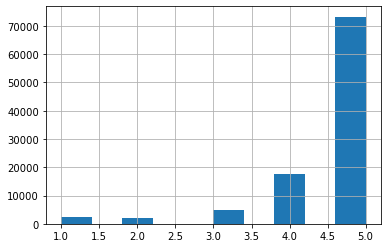

In [3]:
dataset['Label'].hist()

In [4]:
dataset['Label'].value_counts()

5    73276
4    17558
3     5016
1     2403
2     2219
Name: Label, dtype: int64

In [5]:
# 어중간한 3점 삭제해 버리기
rating_3 = dataset[dataset['Label']==3].index
del_3 = dataset.drop(rating_3)
dataset=del_3

In [6]:
dataset['Label'].value_counts()

5    73276
4    17558
1     2403
2     2219
Name: Label, dtype: int64

In [7]:
# 현재 4~5점(긍정)에 데이터가 너무 많음
#1~2점(부정)과 4~5점(긍정) 데이터 비율을 맞춰주기
def reduce_size(x):
    if len(x.index) > 70000:
        return x.sample(n=int(len(x.index)/35)) #70000/2200
    elif len(x.index) > 17000:
        return x.sample(n=int(len(x.index)/7)) #17000/2200
    else:
        return x

dataset = dataset.groupby('Label').apply(reduce_size).reset_index(drop=True)
dataset['Label'].value_counts()

# 4~5점 = 4601 / 1~2점 = 4622

4    2508
1    2403
2    2219
5    2093
Name: Label, dtype: int64

In [8]:
dataset.shape

(9223, 2)

In [9]:
dataset

,Review,Label
0,This course doesn't contain any new informatio...,1
1,I do not find very interesting this course. to...,1
2,A lot of speaking without any sense. Skip it a...,1
3,It's not a course... this is a very short gene...,1
4,"First of all, I really enjoyed Professor Ittne...",1
...,...,...
9218,best coursera class of them all. The instructo...,5
9219,Great content and delivered well. Kudos Prof R...,5
9220,Very specific. Repetition provided is helpful.,5
9221,"very interresting course, I learned a lot.",5


In [10]:
#replace has a default arg inplace=False. 
#Thus, your results will not affect each other and you will have to combine them into dataset['label']=dataset['label'].replace([1,2,4,5],[0,0,1,1]) or 
#dataset['label'].replace([1,2,4,5],[0,0,1,1],inplace=True)

dataset['Label']=dataset['Label'].replace([1,2,4,5],[0,0,1,1])

In [11]:
dataset['Label'].value_counts()

0    4622
1    4601
Name: Label, dtype: int64

In [12]:
# Ready to split 'train set' and  'test set'
X = dataset['Review']
y = dataset['Label']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y,  test_size=0.5,shuffle=True,  random_state=1004)
             
print('X_train shape:', X_train.shape)

print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)

print('y_test shape:', y_test.shape)

X_train shape: (4611,)
X_test shape: (4612,)
y_train shape: (4611,)
y_test shape: (4612,)


In [15]:
print(type(y_train))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 0    2313
1    2298
Name: Label, dtype: int64
----------------------------
test set: 0    2309
1    2303
Name: Label, dtype: int64


In [17]:
X_train

1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896          Really good instructor. Interesting course.
6753    Awesome course! Will definitely tell other peo...
7326       Well structured and good content. very helpful
                              ...                        
2740    The value of this course is the collection of ...
9055                      Awesome Course, Thank you Sir !
8206    Very comprehensible way of teaching. It has he...
8391    The course was really useful! And I would also...
4127    By the end of the course, you do start to deve...
Name: Review, Length: 4611, dtype: object

In [18]:
X_test

5942     Good tools and explanations, good audio. Thanks!
1456    Very bad course too fast is not an introductio...
7128                                Can be more detailed.
5831    Very interesting course in the business aspect...
7466                 Great instructor. Clear and concise.
                              ...                        
5638    It's a short and concise course for all learne...
3380    This instructor reads of a script! He rushes t...
3200    Basically not much content. The guest speaker ...
2075    Beware - will make you upgrade to complete qui...
3624    I do like the course, but Coursera has disable...
Name: Review, Length: 4612, dtype: object

In [19]:
# concat()함수>> df와 series에 다 적용가능
train_set = pd.concat([X_train, y_train], axis = 1)
print(train_set)

                                                 Review  Label
1519  The Lecturers are very enthusiastic, but I was...      0
2501  Beware this course, especially if you are new ...      0
8896        Really good instructor. Interesting course.      1
6753  Awesome course! Will definitely tell other peo...      1
7326     Well structured and good content. very helpful      1
...                                                 ...    ...
2740  The value of this course is the collection of ...      0
9055                    Awesome Course, Thank you Sir !      1
8206  Very comprehensible way of teaching. It has he...      1
8391  The course was really useful! And I would also...      1
4127  By the end of the course, you do start to deve...      0

[4611 rows x 2 columns]


In [20]:
train_set.head(9)

,Review,Label
1519,"The Lecturers are very enthusiastic, but I was...",0
2501,"Beware this course, especially if you are new ...",0
8896,Really good instructor. Interesting course.,1
6753,Awesome course! Will definitely tell other peo...,1
7326,Well structured and good content. very helpful,1
4991,This course is very good!!! My only complaint ...,1
495,I think there are only few contents.,0
1724,"Excellent teaching, but it's not actually free...",0
4835,Great course. Highly recommend.,1


In [23]:
text = train_set.Review
text

1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896          Really good instructor. Interesting course.
6753    Awesome course! Will definitely tell other peo...
7326       Well structured and good content. very helpful
                              ...                        
2740    The value of this course is the collection of ...
9055                      Awesome Course, Thank you Sir !
8206    Very comprehensible way of teaching. It has he...
8391    The course was really useful! And I would also...
4127    By the end of the course, you do start to deve...
Name: Review, Length: 4611, dtype: object

In [25]:
print(type(text))

<class 'pandas.core.series.Series'>


In [26]:
text_combined = str(text)

In [27]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(text_combined , "html5lib") # train_set['Review'][7] is str  # Beautifulsoup(str, "html5lib")
print(example1.get_text()[:10])
print('-----')
print(train_set['Review'][:20])

1519    Th
-----
1519    The Lecturers are very enthusiastic, but I was...
2501    Beware this course, especially if you are new ...
8896          Really good instructor. Interesting course.
6753    Awesome course! Will definitely tell other peo...
7326       Well structured and good content. very helpful
4991    This course is very good!!! My only complaint ...
495                  I think there are only few contents.
1724    Excellent teaching, but it's not actually free...
4835                      Great course. Highly recommend.
2986    Too basic. Should give an example on how these...
6853                    This is an inroductory cousre tou
1909    Instructor doesn't seem to be passionate about...
1625    Pretty bad as far as I am conerned. I spent tw...
8229    This course is very helpful if you're preparin...
4745    I would have liked more information and a broa...
531     I'm sorely disappointed. I learned almost noth...
1493    Poor quality and heavily outdated content. Vid.

In [28]:
import re
letters_only= re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:10]

'        Th'

In [29]:
# making lower case
lower_case = letters_only.lower()
# lower_case = letters_only['Review'].str.lower()    

In [30]:
lower_case

'        the lecturers are very enthusiastic  but i was            beware this course  especially if you are new                   really good instructor  interesting course          awesome course  will definitely tell other peo               well structured and good content  very helpful                                                                   the value of this course is the collection of                               awesome course  thank you sir           very comprehensible way of teaching  it has he            the course was really useful  and i would also            by the end of the course  you do start to deve    name  review  length        dtype  object'

In [57]:
print(type(lower_case))

<class 'str'>


In [31]:
# # Tokenizing
# words = lower_case.split()
# print(len(words))
# words[:10]

82


['the',
 'lecturers',
 'are',
 'very',
 'enthusiastic',
 'but',
 'i',
 'was',
 'beware',
 'this']

## SpaCy install

- I’ve listed below the different statistical models in spaCy along with their specifications:

 - en_core_web_sm: English multi-task CNN trained on OntoNotes. Size – 11 MB

 - en_core_web_md: English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Size – 91 MB

 - en_core_web_lg: English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Size – 789 MB

In [ ]:
# # Download for preprocessing the text
# import nltk
# nltk.download('stopwords')   # from nltk.corpus import stopwords를 위한 resource
# nltk.download('wordnet') # from nltk.stem import WordNetLemmatizer를 위한 resource

In [32]:
!pip install -U spacy

Requirement already up-to-date: spacy in c:\users\dell\anaconda3\lib\site-packages (3.2.4)


In [33]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


2022-04-13 00:42:44.495023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-13 00:42:44.495065: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [34]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-04-13 00:42:56.216775: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-13 00:42:56.216814: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [35]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [46]:
doc = nlp(lower_case)

In [47]:
for token in doc:
    print(token)

        
the
lecturers
are
very
enthusiastic
 
but
i
was
           
beware
this
course
 
especially
if
you
are
new
                  
really
good
instructor
 
interesting
course
         
awesome
course
 
will
definitely
tell
other
peo
              
well
structured
and
good
content
 
very
helpful
                                                                  
the
value
of
this
course
is
the
collection
of
                              
awesome
course
 
thank
you
sir
          
very
comprehensible
way
of
teaching
 
it
has
he
           
the
course
was
really
useful
 
and
i
would
also
           
by
the
end
of
the
course
 
you
do
start
to
deve
   
name
 
review
 
length
       
dtype
 
object


In [48]:
for token in doc:
    print(token.text, token.pos_)

         SPACE
the DET
lecturers NOUN
are AUX
very ADV
enthusiastic ADJ
  SPACE
but CCONJ
i PRON
was AUX
            SPACE
beware VERB
this DET
course NOUN
  SPACE
especially ADV
if SCONJ
you PRON
are AUX
new ADJ
                   SPACE
really ADV
good ADJ
instructor NOUN
  SPACE
interesting ADJ
course NOUN
          SPACE
awesome ADJ
course NOUN
  SPACE
will AUX
definitely ADV
tell VERB
other ADJ
peo PROPN
               SPACE
well ADV
structured ADJ
and CCONJ
good ADJ
content NOUN
  SPACE
very ADV
helpful ADJ
                                                                   SPACE
the DET
value NOUN
of ADP
this DET
course NOUN
is AUX
the DET
collection NOUN
of ADP
                               SPACE
awesome ADJ
course NOUN
  SPACE
thank VERB
you PRON
sir NOUN
           SPACE
very ADV
comprehensible ADJ
way NOUN
of ADP
teaching VERB
  SPACE
it PRON
has VERB
he PRON
            SPACE
the DET
course NOUN
was AUX
really ADV
useful ADJ
  SPACE
and CCONJ
i PRON
would AUX
also ADV
      

In [49]:
nouns = list(doc.noun_chunks)
nouns

[the lecturers,
 i,
 this course,
 you,
 awesome course,
 the value,
 this course,
 the collection,
 awesome course,
 you,
 it,
 he,
 the course,
 i,
 the end,
 the course,
 you,
    name  review  length        dtype,
  object]

In [50]:
list(doc.sents)

[        the lecturers are very enthusiastic  but i was            beware this course  especially if you are new                   really good instructor  interesting course          awesome course  will definitely tell other peo               well structured and good content  very helpful                                                                   the value of this course is the collection of                               awesome course  thank you sir           very comprehensible way of teaching  it has he            the course was really useful  and i would also            by the end of the course  you do start to deve    name  review  length        dtype  object]

In [51]:
for ent in doc.ents:
    print(ent.text,ent.label_)

In [52]:
spacy.displacy.render(doc, style='ent',jupyter=True)

C:\Users\dell\anaconda3\lib\site-packages\spacy\displacy\__init__.py:200: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [53]:
for token in doc:
    print(token.text, token.lemma_)

                 
the the
lecturers lecturer
are be
very very
enthusiastic enthusiastic
   
but but
i I
was be
                       
beware beware
this this
course course
   
especially especially
if if
you you
are be
new new
                                     
really really
good good
instructor instructor
   
interesting interesting
course course
                   
awesome awesome
course course
   
will will
definitely definitely
tell tell
other other
peo peo
                             
well well
structured structured
and and
good good
content content
   
very very
helpful helpful
                                                                                                                                     
the the
value value
of of
this this
course course
is be
the the
collection collection
of of
                                                             
awesome awesome
course course
   
thank thank
you you
sir sir
                     
very very
comprehensible compreh

In [54]:
spacy.displacy.render(doc, style='dep',jupyter=True)

### Remove Stopwords 

In [61]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words

# text = " we will show how to remove stopwords using spacy library"

lst=[]
for token in lower_case.split():
    if token.lower() not in stopwords:    #checking whether the word is not 
        lst.append(token)                    #present in the stopword list.
        
# #Join items in the list
print("Original text  : ",lower_case)
print('---')
print("Text after removing stopwords  :   ",' '.join(lst))

Original text  :          the lecturers are very enthusiastic  but i was            beware this course  especially if you are new                   really good instructor  interesting course          awesome course  will definitely tell other peo               well structured and good content  very helpful                                                                   the value of this course is the collection of                               awesome course  thank you sir           very comprehensible way of teaching  it has he            the course was really useful  and i would also            by the end of the course  you do start to deve    name  review  length        dtype  object
---
Text after removing stopwords  :    lecturers enthusiastic beware course especially new good instructor interesting course awesome course definitely tell peo structured good content helpful value course collection awesome course thank sir comprehensible way teaching course useful end course start 

In [ ]:
# 이거 전체 적용하는 건가?


# def review_to_words(raw_review ):
#     # 1. HTML 제거
#     review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
#     # 2. 영문자가 아닌 문자는 공백으로 변환
#     letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
#     # 3. 소문자 변환
#     words = letters_only.lower().split()
#     # 4. 파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
#     # stopwords 를 세트로 변환한다.
#     stops = set(stopwords.words('english'))
#     # 5. Stopwords 불용어 제거
#     meaningful_words = [w for w in words if not w in stops]
#     # 6. 어간추출
#     stemming_words = [stemmer.stem(w) for w in meaningful_words]
#     # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
#     return( ' '.join(stemming_words) )

In [ ]:
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [ ]:
%time clean_train_reviews = apply_by_multiprocessing(\
    train_set['Review'], review_to_words, workers=4)  

In [ ]:
clean_train_reviews

In [ ]:
%time clean_test_reviews = apply_by_multiprocessing(\
   X_test, review_to_words, workers=4)  

### Bag-of-words model - Wikipedia  
다음의 두 문장이 있다고 하자,  

(1) John likes to watch movies. Mary likes movies too.  
(2) John also likes to watch football games.  
위 두 문장을 토큰화 하여 가방에 담아주면 다음과 같다.  

[
    "John",  
    "likes",  
    "to",  
    "watch",  
    "movies",  
    "Mary",    
    "too",  
    "also",  
    "football",  
    "games"  
]  
그리고 배열의 순서대로 가방에서 각 토큰이 몇 번 등장하는지 횟수를 세어준다.  
  
(1) [1, 2, 1, 1, 2, 1, 1, 0, 0, 0]    
(2) [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]    
=> 머신러닝 알고리즘이 이해할 수 있는 형태로 바꿔주는 작업이다.  
  
단어 가방을 n-gram을 사용해 bigram 으로 담아주면 다음과 같다.  

[  
    "John likes",  
    "likes to",  
    "to watch",  
    "watch movies",  
    "Mary likes",  
    "likes movies",  
    "movies too",  
]

**>>여기서는 입력한 텍스트를 자동으로 BoW로 만드는 CountVectorizer를 사용한다.**   

**>>CountVectorizer를 통해 위 작업을 한다.** 

### CountVectorizer
- 기본코드  
`from sklearn.feature_extraction.text import CountVectorizer`    
`tdmvector = CountVectorizer()`    
`X_train_tdm = tdmvector.fit_transform(newsdata.data)`    
<br><br>
- CountVectorizer 파라미터  
출처: https://chan-lab.tistory.com/27 [은공지능 공작소]
1.  **analyzer**
  - 학습단위를 결정하는 파라미터입니다.
  - word, char 2가지 옵션 정도를 고려해볼 수 있습니다.
  - analyzer = 'word'라고 설정시, 학습의 단위를 단어로 설정합니다. (ex - home, go, my ...)
  - analyzer = 'char'라고 설정시, 학습의 단위를 글자로 설정합니다.(ex - a, b, c, d ...)
  - char 기반의 analyzer을 하면, ('a', 1), ('b', 2), ('c', 3), ('e', 4), ('g', 5), ('h', 6), ('i', 7)... 형태로 출력되기 때문에 실제 모델에서
좋은 성능을 보일지 의문이 남을 수도 있을 것 같습니다.  
결론부터 말씀드리면, 상당히 좋은 결과를 내놓을 수 있습니다.  
제가 CNN 모델에서 char analyzer로 학습을 시킨 적이 있었는데,
생각보다 괜찮은 결과가 나왔던 것으로 기억합니다.  
그러니 모델의 성능을 올리기 위해서, word 기반 방법만 고집할 것이 아니라 char 기반의 방법도 시도해 볼 만하다고 생각합니다.  

2. **min_df**
  - 최소 빈도값을 설정해주는 파라미터
최소 DF가 2로 설정되었으니, 1인 것들은 모두 탈락하게 됩니다.

3. **ngram_range 파라미터**   
  - 만약 ngram_range = (1, 3)라고 한다면, 단어의 묶음을 1개부터 3개까지 설정하라는 뜻입니다.
  - 단어사전에는 1개 단어묶음도 있고, 2개 단어묶음도, 3개 단어묶음도 존재하게 되겠죠.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),
                             max_features = 20000
                            )
vectorizer #파라미터가 잘 적용됐는지 찍어보기.자주찍어보는게 좋다. 

## pipeline  
이제 학습 파이프라인을 만듭니다.   
pipeline은 feature engineering의 여러 과정을 묶어 줄 때 사용합니다.  sklearn에서는 Pipeline이라는 클래스로 두 모델을 연결할 수 있습니다.    
가장 먼저 CounterVectorizer를 이용해 단어를 숫자로 인코딩 한뒤, 인코딩된 숫자를 곧 바로 NaiveBayes 모델의 입력으로 넣어서 학습하는 파이프라인을 고안해볼 수 있습니다.  

[예시]  

from sklearn.feature_extraction.text import CountVectorizer  
pipeline = Pipeline([  
    ('word_encoder', CountVectorizer(analyzer=preprocess)),  
    ('classifier', BernoulliNB())  
])  
  
pipeline.fit(train_feature, train_label)  
  

https://deepinsight.tistory.com/173

In [ ]:
# 여기에서는 하나의 과정만 묶어주어 pipeline이 불필요 할 수도 있습니다.

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vect', vectorizer),
])  

In [ ]:
'''
CountVectorizer는 여러 메소드 목록을 제공하고 있습니다.
메소드 중에서 fit_transform 을 하면  term-document matrix 를 반환하는 것을 볼 수 있습니다.
파이프라인으로 fit_transform을 해주게 되는데 해당 과정의 결과로 피처의 목록과 등장여부를 알 수 있습니다.
'''
%time train_data_features = pipeline.fit_transform(clean_train_reviews)
train_data_features

보통 fit을 학습하는데 사용하는데 여기에서는 벡터화 할 때도 fit을 사용했습니다. 사이킷런에 구현된 벡터화 알고리즘이 fit을 사용해서 벡터화 하도록 되어 있습니다. 따라서 RF에서의 fit과 벡터화에 사용되는 fit은 다른 성격입니다.

In [ ]:
# vectorize를 한 결과 
train_data_features.shape

In [ ]:
'''
get_feature_names() 라는 것도 CountVectorizer 에서 사용할 수 있는 메소드 중 하나입니다.
위에서 정의한 CountVectorizer 에 데이터를 넣어주고 fit 혹은 fit_transform 을 하게 되면 벡터화와 함께 사전(get_feature_names)을 생성하게 됩니다.
'''
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

In [ ]:
# 벡터화 된 피처를 확인해 봄
import numpy as np
dist = np.sum(train_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

In [ ]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
# 100개의 트리
model = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state=2018)
model

In [ ]:
 # model.fit(X_train, y_train)  #모델 학습
# 위에서 X = dataset['Review'], y = dataset['Label'] 으로 해주고 x_train, y_train_split() 했으니까, y_train으로(dataset['Label']이 아니고)

%time model = model.fit(train_data_features, y_train)

# pred = model.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(model, train_data_features, train_set['Label'], cv=10, scoring='roc_auc'))
score


## 예측

In [ ]:
# 체크해 보고 싶은 Review(string)를 Series에 담아준다.
# reveiw_sample1 = "I don't like to spend money to bad lecture, but Cousera MOOC is really helpful to upgrade my understanding of U.S history."

reveiw_sample1 = "I have nothing but good things to say about my experience with Coursera. I have loved the learning I have been able to do and look forward to taking many more classes with them. I have always been interested in Psychology and Coursera has given me the chance to take the classes that really interest me. I don't understand the reviews with low ratings. I have never had any problems with them. "
sample1 = pd.Series(reveiw_sample1)

In [ ]:
# 테스트 데이터를 벡터화 함
%time test_data_feature = pipeline.transform(sample1)

test_data_feature = test_data_feature.toarray()

In [ ]:
test_data_feature

In [ ]:
# 벡터화 하며 만든 사전에서 해당 단어가 무엇인지 찾아볼 수 있다.
vocab = vectorizer.get_feature_names()
vocab[8], vocab[2558], vocab[2559], vocab[2560]

In [ ]:
# 테스트 데이터를 넣고 예측한다.
result = model.predict(test_data_feature)
# result[:100] # 100개의 리뷰에 대해서 뽑을 때 
# 여기서는 test_data_feature 하나니까 결과값이 1개 나오는 것임 
print("결과:",result)  #긍정1 부정0

## 모델의 정확도를 높이기 위한 개선 방법
1. Stopwords 라이브러리 추가 
2. Convector 파라미터 바꿔가면서 해보기 
3. kfold를 5-fold CV로 바꿔보기